In [29]:
import tensorflow as tf
import tensorflow_datasets as tfds

In [30]:
(ds_train, ds_test), ds_info = tfds.load(
    'mnist',
    split=['train', 'test'],
    shuffle_files=True,
    as_supervised=True,
    with_info=True,
)

In [31]:
def normalize_img(image, label):
  """Normalizes images: `uint8` -> `float32`."""
  return tf.cast(image, tf.float32) / 255., label

ds_train = ds_train.map(
    normalize_img, num_parallel_calls=tf.data.AUTOTUNE)
ds_train = ds_train.cache()
ds_train = ds_train.shuffle(ds_info.splits['train'].num_examples)
ds_train = ds_train.batch(128)
ds_train = ds_train.prefetch(tf.data.AUTOTUNE)

In [32]:
ds_test = ds_test.map(
    normalize_img, num_parallel_calls=tf.data.AUTOTUNE)
ds_test = ds_test.batch(128)
ds_test = ds_test.cache()
ds_test = ds_test.prefetch(tf.data.AUTOTUNE)

In [33]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(10)
])
model.compile(
    optimizer=tf.keras.optimizers.Adam(0.001), # optimization function
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), # loss function
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()],
)

model.fit(
    ds_train,
    epochs=6,
    validation_data=ds_test,
)

Epoch 1/6


/Users/abdulhafidh/Documents/exam/exam-venv/lib/python3.9/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.7237 - sparse_categorical_accuracy: 0.7990 - val_loss: 0.2380 - val_sparse_categorical_accuracy: 0.9317
Epoch 2/6
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 870us/step - loss: 0.2249 - sparse_categorical_accuracy: 0.9363 - val_loss: 0.1810 - val_sparse_categorical_accuracy: 0.9503
Epoch 3/6
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 726us/step - loss: 0.1685 - sparse_categorical_accuracy: 0.9516 - val_loss: 0.1502 - val_sparse_categorical_accuracy: 0.9575
Epoch 4/6
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 682us/step - loss: 0.1366 - sparse_categorical_accuracy: 0.9605 - val_loss: 0.1291 - val_sparse_categorical_accuracy: 0.9620
Epoch 5/6
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 691us/step - loss: 0.1174 - sparse_categorical_accuracy: 0.9661 - val_loss: 0.1152 - val_sparse_categorical_accuracy: 0.9648
Epoch 6/6
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 711us/step - loss: 0.0993 - sparse_categorical_accuracy: 0.9717 - val_loss: 0.1059 - val_sparse_categorical_accuracy: 0.9679


In [34]:
# model evaluation
test_loss, test_acc = model.evaluate(ds_test, verbose=2)
print('\nTest accuracy:', test_acc)


79/79 - 0s - 513us/step - loss: 0.1059 - sparse_categorical_accuracy: 0.9679

Test accuracy: 0.9678999781608582


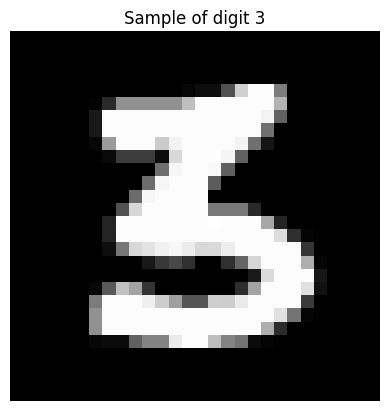

In [35]:
import matplotlib.pyplot as plt

# Find a sample of digit 2 in the test set
for image, label in ds_test.unbatch():
    number = 3
    if label.numpy() == number:
        plt.imshow(image.numpy().reshape(28, 28), cmap='gray')
        plt.title(f"Sample of digit {number}")
        plt.axis('off')
        plt.show()
        break


In [37]:
# save the model into h5 format
model.save('mnist_model.keras')